<a href="https://colab.research.google.com/github/SKFazleeRabby/Machine-Learning-with-Python-A-Practical-Introduction/blob/master/classification/classification_of_customers_in_telecommunication_system_using_KNN_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**<center>Classification of Customers in Telecommunication System using KNN Algorithm</center>**

<center>Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset, with predefined labels, we need to build a model to be used to predict class of a new or unknown case. The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns. The target field, called custcat, has four possible values that correspond to the four customer groups, as follows: 1- Basic Service 2- E-Service 3- Plus Service 4- Total Service Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.</center>

###**Importing Dataset**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

###**Downloading the Dataset from IBM Object Storage**

In [3]:
!wget -O TeleCust.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv

--2020-07-10 19:23:47--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37048 (36K) [text/csv]
Saving to: ‘TeleCust.csv’

TeleCust.csv        100%[===================>]  36.18K  --.-KB/s    in 0.1s    

2020-07-10 19:23:47 (247 KB/s) - ‘TeleCust.csv’ saved [37048/37048]



###**Reading & Exploring the Dataset**

In [4]:
df = pd.read_csv('TeleCust.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [5]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab9b2a1f60>]],
      dtype=object)

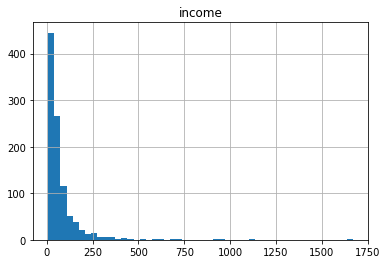

In [6]:
df.hist(column='income', bins=50)

###**Pre-Processing Data**

In [7]:
from sklearn.preprocessing import StandardScaler

X_data = df[['region',	'tenure',	'age',	'marital',	'address',	'income',	'ed',	'employ',	'retire',	'gender',	'reside']].values
y_data = df['custcat'].values

standard = StandardScaler()
X_data = standard.fit(X_data).transform(X_data)

###**Splitting Data into Train & Test Set**

In [8]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X_data, y_data, test_size=0.2, random_state=4)
print("Size of Training Set: ", train_X.shape[0])
print("Size of Testing Set: ", test_X.shape[0])

Size of Training Set:  800
Size of Testing Set:  200


###**Training Our Model using KNN Alrogithm**

In [9]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

###**Accuracy Evaluation**

In [10]:
from sklearn.metrics import accuracy_score

predicted_y = classifier.predict(test_X)

print("Train Accuracy Score: ", accuracy_score(classifier.predict(train_X), train_y))
print("Test Accuracy Score: ", accuracy_score(predicted_y, test_y))

Train Accuracy Score:  0.5475
Test Accuracy Score:  0.32


###**Trying with the Value K=6 and see if the accuracy improves**

In [11]:
new_classifier = KNeighborsClassifier(n_neighbors=6)
new_classifier.fit(train_X, train_y)

new_predicted_y = new_classifier.predict(test_X)

print("Train Accuracy Score: ", accuracy_score(new_classifier.predict(train_X), train_y))
print("Test Accuracy Score: ", accuracy_score(predicted_y, test_y))

Train Accuracy Score:  0.51625
Test Accuracy Score:  0.32


In [12]:
number_of_k = 10
accuracy_set = []

for k in range(1,number_of_k):
  iterative_classifier = KNeighborsClassifier(n_neighbors=k)
  iterative_classifier.fit(train_X, train_y)
  iterative_predicted = iterative_classifier.predict(test_X)
  accuracy = accuracy_score(iterative_predicted, test_y)
  accuracy_set.append(accuracy)

print("The Maximum Accuracy is %.2f and it can be obtained with a value K=%d" % (max(accuracy_set), np.argmax(accuracy_set) + 1))

The Maximum Accuracy is 0.34 and it can be obtained with a value K=9


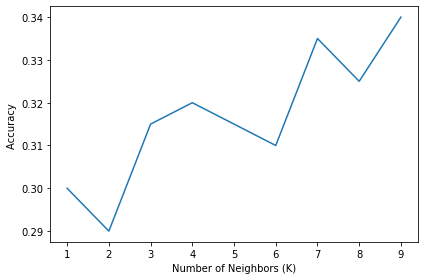

In [16]:
plt.plot(range(1, number_of_k), accuracy_set)
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

##**<center>Thank You for Your Patience</center>**